In [ ]:
#|default_exp app

In [1]:
import sys
print(sys.path)

['/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python310.zip', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10/lib-dynload', '', '/opt/homebrew/Caskroom/miniforge/base/envs/fast/lib/python3.10/site-packages']


In [6]:
#|export
from fastai.vision.all import *
from PIL import Image
import matplotlib.pyplot as plt
import gradio as gr

def is_cat(x): return x[0].isupper()

In [62]:
def display_thumbnails_grid(images, rows, cols):
  """Displays thumbnails of PIL images in a grid of subplots."""
  fig, axes = plt.subplots(rows, cols, figsize=(10, 10))  # Adjust figsize for better view

  for i, image in enumerate(images):
    # Ensure we stay within grid limits
    if i >= rows * cols:
      break

    axes.flat[i].axis('off')  # Hide axes for cleaner view    
    axes.flat[i].imshow(image)
    
  plt.tight_layout()
  plt.show()

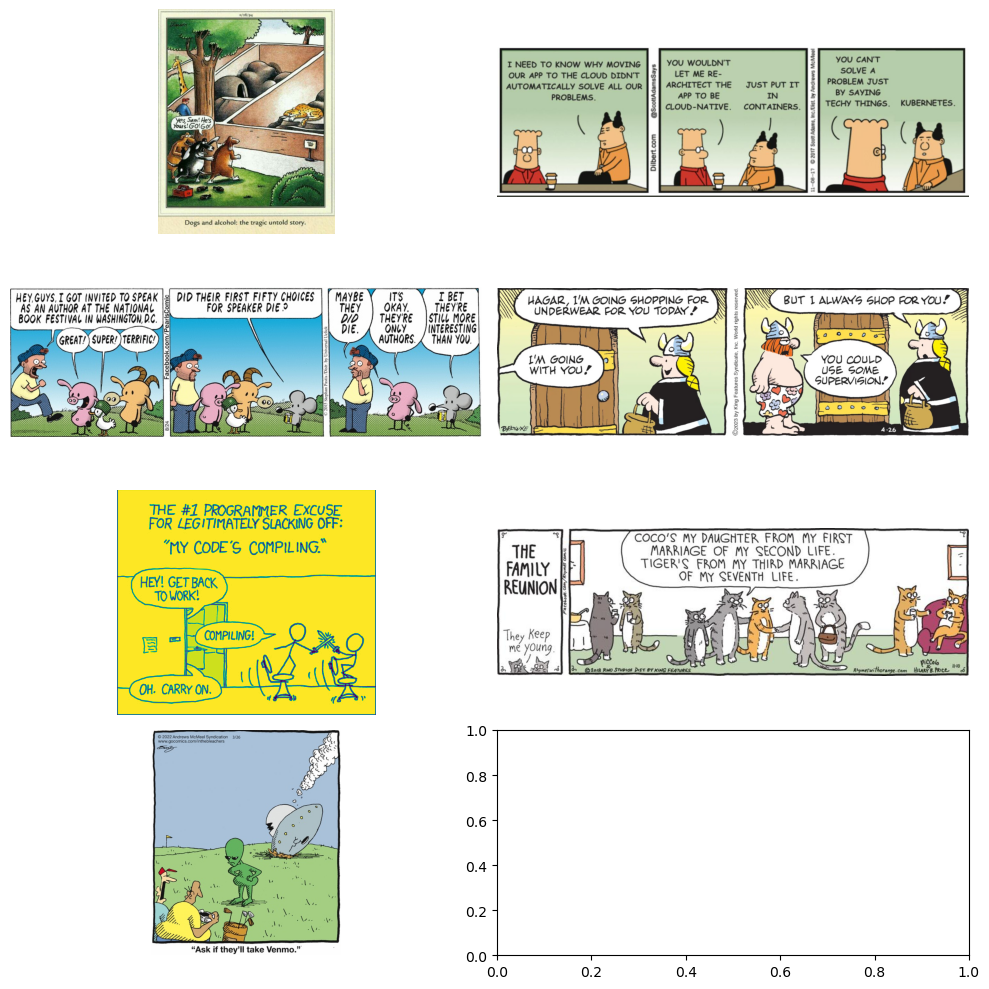

In [68]:
example_image_paths = [
    'images/tfh-dogs-alcohol.jpg',
    'images/dbt-techy-things.jpg',
    'images/pbs-book-festival.jpg',
    'images/hth-underwear.jpg',
    'images/xk-compiling.jpg',
    'images/rwo-family-reunion.jpg',
    'images/itb-golf-saucer.jpg'
]

example_images = list(map(Image.open, example_image_paths))

display_thumbnails_grid(example_images, 4, 2)

In [69]:
#|export
learn = load_learner('models/02.pkl')

In [70]:
learn.predict(example_images[2])

('pbs',
 tensor(3),
 tensor([1.8539e-04, 2.2655e-03, 9.7562e-03, 9.8699e-01, 9.9603e-05, 1.7290e-04,
         5.3223e-04]))

In [71]:
#|export
categories = ('tfs', 'xk', 'dbt', 'pbs', 'rwo', 'hth', 'itb')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    print(pred)
    print(idx)
    print(probs)
    
    return dict(zip(sorted(categories), map(float, probs)))

In [78]:
classify_image(example_images[0])

tfs
tensor(5)
tensor([1.3447e-09, 1.4674e-08, 2.7015e-07, 9.9760e-07, 2.2540e-08, 1.0000e+00,
        2.4560e-08])


{'dbt': 1.344684696924503e-09,
 'hth': 1.4674387927016141e-08,
 'itb': 2.701493713175296e-07,
 'pbs': 9.975971124731586e-07,
 'rwo': 2.25399539033333e-08,
 'tfs': 0.9999986886978149,
 'xk': 2.4560355527114552e-08}

#|export

image = gr.Image(thumbnail=(192,192))
label = gr.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=example_image_paths)
intf.launch(inline=False)